<a name='top'></a>    
<div style="width:900px;background:#fdf0db;border:1px solid black;text-align:left;padding:8px;">
    <p>
        <span style="font-size:14pt">
            <b>Data Modelling and Analysis</b>
        </span>
    </p>
</div>

<div style="width:900px;background:#f2f2f2;border:1px solid black;text-align:left;padding:8px;">
Here, we will now use different models 
 

   

## Notebook Outline ##    
1. [Question 1 (Factors that impact salary)](#q1)    
1.1   [Modelling](#q1mod0)    
1.1.1 [Logistic Regression](#q1mod1)     
1.1.2 [RandomForest Classifier (RFC)](#q1mod2)     
1.1.3 [Decision Tree Classifier](#q1mod3)    
1.1.4 [SVM](#q1mod4)    
1.1.5 [Regression models](#q1mod5)    
1.2   [Summary](#q1mod6)    
<br>
2. [Question 2 (Factors that distinguish Job Category)](#q2)    
2.1   [EDA Data Analysis](#eda)    
2.2   [Modelling](#q2mod0)    
2.2.1 [Logistic Regression](#q2mod1)     
2.2.2 [RandomForest Classifier (RFC)](#q2mod2)     
2.2.3 [Decision Tree Classifier](#q2mod3)    
2.3   [Summary](#q2mod5)        


</div>

In [1]:
import os
from selenium import webdriver
from time import sleep
from bs4 import BeautifulSoup

import pandas as pd
import numpy as np
import re

import seaborn as sns
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import warnings

sns.set_style("whitegrid")
warnings.filterwarnings('ignore')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

<div style="width:610px;background:#fdf0db;border:1px solid black;
  text-align:left;padding:8px;"><b>
<h7><a name='open'><font color=black>Open final_webscrape.csv    
    </a></h7></b>    

</div>

In [2]:
file='final_webscrape.csv'
path='data\\'
df = pd.read_csv('{}{}'.format(path,file), encoding='latin1')

In [3]:
## drop unnamed field
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head(3)

,job_titles,companys,employment_type,seniority,industrys,salary,salary_terms,job_descriptions,job_requirements,links,location,gov_support,min_salary,max_salary,average_salary,salary_med,job_titles_topics,job_description_topic,job_req_topics
0,Applied Data Science Associate,DATAROBOT SINGAPORE PTE. LTD.,Permanent,Professional,Information Technology,90000to150000,Monthly,Looking to move into Data Science? Want to lea...,RequirementsMain Requirements Experience/Trai...,https://www.mycareersfuture.sg/job/applied-dat...,Central,yes,7500.0,12500.0,10000.0,1,5,6,4
1,Senior / Data Engineer (Data Science Team),M1 LIMITED,Full Time,Fresh/entry level,Engineering,3500to5800,Monthly,"Design, optimise/tune performance, maintain, ...",Requirements BachelorÃ¢ÂÂs degree in Compute...,https://www.mycareersfuture.sg/job/senior-data...,West,yes,3500.0,5800.0,4650.0,0,7,6,5
2,Data Science Engineer,DATAROBOT SINGAPORE PTE. LTD.,Permanent,Professional,Information Technology,90000to150000,Monthly,"As a Data Science Engineer in DataRobot, you w...",Requirements 5+ years of combined python Engin...,https://www.mycareersfuture.sg/job/data-scienc...,Central,yes,7500.0,12500.0,10000.0,1,0,6,5


In [4]:
[x for x in df.columns]

['job_titles',
 'companys',
 'employment_type',
 'seniority',
 'industrys',
 'salary',
 'salary_terms',
 'job_descriptions',
 'job_requirements',
 'links',
 'location',
 'gov_support',
 'min_salary',
 'max_salary',
 'average_salary',
 'salary_med',
 'job_titles_topics',
 'job_description_topic',
 'job_req_topics']

In [5]:
## We will only use the relevant columns
cols=[
 'employment_type',
 'seniority',
 'industrys',
 'location',
 'gov_support',
 'salary_med',
 'job_titles_topics',
 'job_description_topic',
 'job_req_topics']

df1=df[cols]
df1.head(3)

,employment_type,seniority,industrys,location,gov_support,salary_med,job_titles_topics,job_description_topic,job_req_topics
0,Permanent,Professional,Information Technology,Central,yes,1,5,6,4
1,Full Time,Fresh/entry level,Engineering,West,yes,0,7,6,5
2,Permanent,Professional,Information Technology,Central,yes,1,0,6,5


In [6]:
dummy_cols=['employment_type','seniority','industrys','location','gov_support', 
            'job_description_topic', 'job_req_topics', 'job_titles_topics']

In [7]:
df1_dummy= pd.get_dummies(df1,columns=dummy_cols,drop_first=True)
print(df1_dummy.shape)

(598, 45)


In [8]:
X=df1_dummy.drop('salary_med', axis=1)

In [9]:
y=df1.salary_med

## <a name='q1'><font color=black> Question 1 (Factors that impact salary)

<div style="width:610px;background:#fdf0db;border:1px solid black;
  text-align:left;padding:8px;"><b>
<h7><a name='q1mod0'><font color=black>Modelling  
    </a></h7></b>    
</div>

<div style="width:610px;background:#fdf0db;border:1px solid black;
  text-align:left;padding:8px;"><b>
<h7><a name='q1mod1'><font color=black>Logistic Regression  
    </a></h7></b>    
</div>

In [10]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# cross val Log Reg with 4 folds
cls_scores = cross_val_score(LogisticRegression(), X, y, cv=4, scoring='roc_auc')

#get scores
print(cls_scores, np.mean(cls_scores))

# fit models
logreg = LogisticRegression().fit(X, y) #AUC

[0.86432519 0.78213585 0.72206148 0.8505425 ] 0.8047662557624227


In [11]:
# the score looks ok. now lets check the score of the other models

<div style="width:610px;background:#fdf0db;border:1px solid black;
  text-align:left;padding:8px;"><b>
<h7><a name='q1mod2'><font color=black>RandomForest Classifier (RFC) 
    </a></h7></b>    
</div>

In [12]:
#train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [14]:
rfc_pred = rfc.predict(X_test)

In [15]:
print(confusion_matrix(y_test,rfc_pred))

[[69 26]
 [15 70]]


In [16]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.82      0.73      0.77        95
           1       0.73      0.82      0.77        85

   micro avg       0.77      0.77      0.77       180
   macro avg       0.78      0.77      0.77       180
weighted avg       0.78      0.77      0.77       180



In [17]:
## FINDINGS:

# RFC works better for both category when compared to 
#     logistic classification

<div style="width:610px;background:#fdf0db;border:1px solid black;
  text-align:left;padding:8px;"><b>
<h7><a name='q1mod3'><font color=black>Decision Tree Classifier  
    </a></h7></b>    
</div>

In [18]:
from sklearn.tree import DecisionTreeClassifier

# gridsearch params
dtc_params = {
    'max_depth':[None,1,2,3,4],
    'max_features':[None,'log2','sqrt',2,3,4,5],
    'min_samples_split':[2,3,4,5,10,15,20,25,30,40,50]
}

from sklearn.model_selection import GridSearchCV
# set the gridsearch
dtc_gs = GridSearchCV(DecisionTreeClassifier(), 
                      dtc_params, 
                      cv=5, 
                      verbose=1, 
                      scoring='roc_auc', 
                      n_jobs=-1)

In [19]:
# use the gridearc C model to fit the data
dtc_gs.fit(X, y)

Fitting 5 folds for each of 385 candidates, totalling 1925 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done 1925 out of 1925 | elapsed:   12.1s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': [None, 1, 2, 3, 4], 'max_features': [None, 'log2', 'sqrt', 2, 3, 4, 5], 'min_samples_split': [2, 3, 4, 5, 10, 15, 20, 25, 30, 40, 50]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=1)

In [20]:
dtc_best = dtc_gs.best_estimator_
print(dtc_gs.best_params_)
print(dtc_gs.best_score_)

{'max_depth': None, 'max_features': 'sqrt', 'min_samples_split': 40}
0.7760705676538057


In [21]:
# print out important features

fi = pd.DataFrame({
        'feature':X.columns,
        'importance':dtc_best.feature_importances_
    })

fi.sort_values('importance', ascending=False, inplace=True)
fi

,feature,importance
28,job_req_topics_3,0.107398
5,seniority_Middle Management,0.106254
23,job_description_topic_7,0.098562
21,job_description_topic_5,0.075648
7,seniority_Professional,0.067620
15,location_West,0.064749
3,seniority_Junior Executive,0.057586
2,seniority_Fresh/entry level,0.046052
9,seniority_Senior Management,0.036959
42,job_titles_topics_8,0.035990


In [22]:
## Findings:

# Decision tree performs slightly lower than the logistic regression.
# However, RFC works better than this model...

#RAJ Some of the important features were noted which will be summarised at the end.

<div style="width:610px;background:#fdf0db;border:1px solid black;
  text-align:left;padding:8px;"><b>
<h7><a name='q1mod4'><font color=black>SVM  
    </a></h7></b>    
</div>

In [23]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
Xn = ss.fit_transform(X)

In [24]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

for kernel in ['linear', 'poly', 'rbf', 'sigmoid']:
    svm = SVC(kernel=kernel, degree=3)
    scores = cross_val_score(svm, Xn, y, cv=5, scoring='roc_auc')
    sm = scores.mean()
    ss = scores.std()
    print("{} - Average score: {:0.3} +/- {:0.3}".format(kernel,sm, ss))

linear - Average score: 0.803 +/- 0.0593
poly - Average score: 0.82 +/- 0.0709
rbf - Average score: 0.833 +/- 0.0605
sigmoid - Average score: 0.799 +/- 0.0565


In [25]:
from sklearn.metrics import classification_report

def print_cm_cr(y_true, y_pred):
    """prints the confusion matrix and the classification report"""
    confusion = pd.crosstab(y_true, 
                            y_pred, 
                            rownames=['Actual'], 
                            colnames=['Predicted'], 
                            margins=True)
    print(confusion)
    print('')
    print(classification_report(y_true, y_pred))

In [26]:
# cross val on linear kernel resulted in better scores so 
#used the linear kernal to build/test our final model below.

In [27]:
from sklearn.model_selection import train_test_split

lin_model = SVC(kernel='linear')
X_train, X_test, y_train, y_test = train_test_split(Xn, y, stratify=y, test_size=0.33)
lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
print_cm_cr(y_test, y_pred)

Predicted   0    1  All
Actual                 
0          62   31   93
1          16   89  105
All        78  120  198

              precision    recall  f1-score   support

           0       0.79      0.67      0.73        93
           1       0.74      0.85      0.79       105

   micro avg       0.76      0.76      0.76       198
   macro avg       0.77      0.76      0.76       198
weighted avg       0.77      0.76      0.76       198



In [28]:
# SVM performance is lower than RFC

<div style="width:610px;background:#fdf0db;border:1px solid black;
  text-align:left;padding:8px;"><b>
<h7><a name='q1mod5'><font color=black>Regression Models  
    </a></h7></b><br>    
* We will Apply Regression models to compare the results with the classification models    
</div>

In [29]:
to_drop=['job_titles','companys','salary','salary_terms','job_descriptions', 'job_requirements', 'links', 
         'min_salary', 'max_salary', 'salary_med']

df2=df.drop(columns=to_drop, axis=1)
df2.head(3)

,employment_type,seniority,industrys,location,gov_support,average_salary,job_titles_topics,job_description_topic,job_req_topics
0,Permanent,Professional,Information Technology,Central,yes,10000.0,5,6,4
1,Full Time,Fresh/entry level,Engineering,West,yes,4650.0,7,6,5
2,Permanent,Professional,Information Technology,Central,yes,10000.0,0,6,5


In [30]:
dummy_cols=['employment_type','seniority','industrys','location','gov_support', 
            'job_description_topic', 'job_req_topics', 'job_titles_topics']

df2_dummy= pd.get_dummies(df2,columns=dummy_cols,drop_first=True)
print(df2_dummy.shape)

(598, 45)


In [31]:
X2=df2_dummy.drop('average_salary', axis=1)

In [32]:
y2=df.average_salary

In [33]:
#train test split
from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.30)

In [34]:
## Standard Scaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso, LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.model_selection import cross_val_score

ss = StandardScaler()
X2s_train= ss.fit_transform(X2_train)
X2s_test=ss.transform(X2_test)

In [35]:
ridge_alphas = np.logspace(-2, 7, 50)

optimal_ridge = RidgeCV(alphas=ridge_alphas, cv=10)
optimal_ridge.fit(X2s_train, y2_train)

print(optimal_ridge.alpha_)

47.14866363457394


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [36]:
optimal_lasso = LassoCV(n_alphas=500, cv=10, verbose=1)
optimal_lasso.fit(X2s_train, y2_train)

print(optimal_lasso.alpha_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
.......................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

17.44623483648864


......................................................................................................................................[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.6s finished


In [37]:
def print_cross_val_results(model,name,X,y,folds=5):
    print( '------------------------------------\n')
    print('{}-Fold Cross Validated Results for Model: '.format(folds)+ name)
    scores = cross_val_score(model, X, y, cv=folds)
    print("Cross-validated scores:", scores)
    print("Mean CV R2:", np.mean(scores))
    print('Std CV R2:', np.std(scores))

OLS = LinearRegression()
ridge = Ridge(alpha=optimal_ridge.alpha_)
lasso= Lasso(alpha=optimal_lasso.alpha_)

print_cross_val_results(OLS,"Linear Regression",X2s_train,y2_train)
print_cross_val_results(ridge,"Ridge Regression",X2s_train,y2_train)
print_cross_val_results(lasso,"Lasso Regression",X2s_train,y2_train)

------------------------------------

5-Fold Cross Validated Results for Model: Linear Regression
Cross-validated scores: [0.27637794 0.43249563 0.47972793 0.2129906  0.38859206]
Mean CV R2: 0.35803683345941506
Std CV R2: 0.09898791853768145
------------------------------------

5-Fold Cross Validated Results for Model: Ridge Regression
Cross-validated scores: [0.34578936 0.45241603 0.50140813 0.24039641 0.37874652]
Mean CV R2: 0.38375128986987245
Std CV R2: 0.09008302585827281
------------------------------------

5-Fold Cross Validated Results for Model: Lasso Regression
Cross-validated scores: [0.31982752 0.43530729 0.48722432 0.22574276 0.38242062]
Mean CV R2: 0.370104500136396
Std CV R2: 0.09109141598214764


In [38]:
# All the Regression models shows terrible results. 

[Go Top](#top)

<div style="width:610px;background:#fdf0db;border:1px solid black;
  text-align:left;padding:8px;"><b>
<h7><a name='q1mod6'><font color=black>Summary  
    </a></h7></b>    
</div>

## Summary:

1. We ran several models (logistic, decision tree classification, SVM and regression models) and the model that had the best result was RFC

2. The 5 most important features that contribute the salary are as follows:

| Feature | Details (Top Values)  |
|------|------|
| location | West |
| Job Request (Topic 3) | <b>TOP 15 WORDS:</b> ['deadlines', 'skill', 'andâ', 'requirementsjob', 'direct', 'handle', 'tight', 'account', 'negotiation', 'situation', 'selling', 'stressful', 'consultation', 'com', 'thank'] |
| seniority	 | Fresh/entry level |
| Job Request (Topic 1) | <b>TOP 15 WORDS:</b> ['servers', 'range', 'cissp', '6pm', '9am', 'fridays', 'comptia', 'mondays', 'ceh', 'relevant', 'com', 'salary', 'possess', 'ecsa', 'thank'] |
| seniority | Junior Executive |




## <a name='q2'><font color=black>Question 2 (Factors that distinguish Job Category)
    
<b>Objective:</b> To understand the features affecting the seniority (ex: professional, executive, fresh/entry etc)
    

<div style="width:610px;background:#fdf0db;border:1px solid black;
  text-align:left;padding:8px;"><b>
<h7><a name='eda'><font color=black>EDA Data Analysis  
    </a></h7></b>    
</div>

In [39]:
df.head(3)

,job_titles,companys,employment_type,seniority,industrys,salary,salary_terms,job_descriptions,job_requirements,links,location,gov_support,min_salary,max_salary,average_salary,salary_med,job_titles_topics,job_description_topic,job_req_topics
0,Applied Data Science Associate,DATAROBOT SINGAPORE PTE. LTD.,Permanent,Professional,Information Technology,90000to150000,Monthly,Looking to move into Data Science? Want to lea...,RequirementsMain Requirements Experience/Trai...,https://www.mycareersfuture.sg/job/applied-dat...,Central,yes,7500.0,12500.0,10000.0,1,5,6,4
1,Senior / Data Engineer (Data Science Team),M1 LIMITED,Full Time,Fresh/entry level,Engineering,3500to5800,Monthly,"Design, optimise/tune performance, maintain, ...",Requirements BachelorÃ¢ÂÂs degree in Compute...,https://www.mycareersfuture.sg/job/senior-data...,West,yes,3500.0,5800.0,4650.0,0,7,6,5
2,Data Science Engineer,DATAROBOT SINGAPORE PTE. LTD.,Permanent,Professional,Information Technology,90000to150000,Monthly,"As a Data Science Engineer in DataRobot, you w...",Requirements 5+ years of combined python Engin...,https://www.mycareersfuture.sg/job/data-scienc...,Central,yes,7500.0,12500.0,10000.0,1,0,6,5


In [40]:
df.seniority.value_counts()

Professional         207
Executive            151
Senior Executive      60
Middle Management     55
Manager               38
Fresh/entry level     25
Junior Executive      22
Senior Management     22
Non-executive         18
Name: seniority, dtype: int64

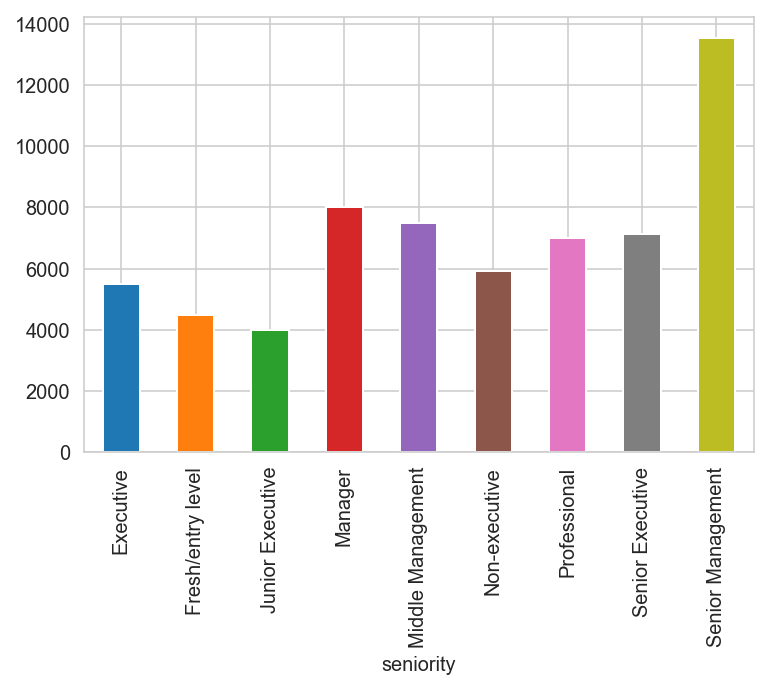

In [41]:
df.groupby(['seniority'])['average_salary'].median().plot.bar()

<BarContainer object of 9 artists>

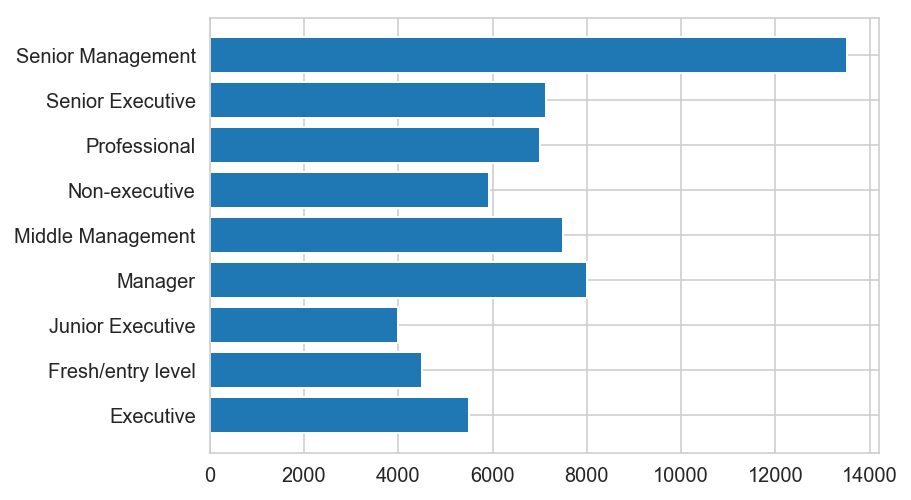

In [42]:
x=df.groupby(['seniority'])['average_salary'].median().index
y=df.groupby(['seniority'])['average_salary'].median().values
plt.barh(x,y)

In [43]:
df['seniority_med']= df.seniority.apply\
(lambda x:2 if x== 'Manager'or x=='Senior Executive' 
            else 1 
                if x=='Middle Management' 
                or x=='Professional' 
                or x=='Senior Executive'
            else 0)

In [44]:
#checking for class balance. it shows that its a balance class

df['seniority_med'].value_counts()

1    262
0    238
2     98
Name: seniority_med, dtype: int64

In [45]:
df1.head(3)

,employment_type,seniority,industrys,location,gov_support,salary_med,job_titles_topics,job_description_topic,job_req_topics
0,Permanent,Professional,Information Technology,Central,yes,1,5,6,4
1,Full Time,Fresh/entry level,Engineering,West,yes,0,7,6,5
2,Permanent,Professional,Information Technology,Central,yes,1,0,6,5


In [46]:
# creating data for classification

dummy_cols=['employment_type','industrys','location','gov_support','job_description_topic', 
            'job_req_topics', 'job_titles_topics']

In [47]:
df3_dummy= pd.get_dummies(df1,columns=dummy_cols,drop_first=True)

col_drop=['salary_med','seniority']

X3=df3_dummy.drop(columns=col_drop, axis=1)
X3['average_salary']=df['average_salary']

In [48]:
X3.head(3)

,employment_type_Full Time,employment_type_Permanent,industrys_Information Technology,location_East,location_Islandwide,location_North,location_South,location_West,gov_support_yes,job_description_topic_1,...,job_titles_topics_1,job_titles_topics_2,job_titles_topics_3,job_titles_topics_4,job_titles_topics_5,job_titles_topics_6,job_titles_topics_7,job_titles_topics_8,job_titles_topics_9,average_salary
0,0,1,1,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,10000.0
1,1,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,1,0,0,4650.0
2,0,1,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,10000.0


In [49]:
#Target is seniority
y3=df['seniority_med']

<div style="width:610px;background:#fdf0db;border:1px solid black;
  text-align:left;padding:8px;"><b>
<h7><a name='q2mod0'><font color=black>Modelling  
    </a></h7></b>    
</div>

<div style="width:610px;background:#fdf0db;border:1px solid black;
  text-align:left;padding:8px;"><b>
<h7><a name='q2mod1'><font color=black>Logistic Regression  
    </a></h7></b>    
</div>

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# cross val Log Reg with 4 folds
cls_scores = cross_val_score(LogisticRegression(), X3, y3, cv=4)

#get scores
print(cls_scores, np.mean(cls_scores))

# fit models
logreg = LogisticRegression().fit(X3, y3) #AUC

[0.49668874 0.50331126 0.41891892 0.59459459] 0.5033783783783784


In [51]:
# Logistic regression works were bad with score as 0.503

<div style="width:610px;background:#fdf0db;border:1px solid black;
  text-align:left;padding:8px;"><b>
<h7><a name='q2mod2'><font color=black>RandomForest Classifier  
    </a></h7></b>    
</div>

In [52]:
#train test split
from sklearn.model_selection import train_test_split
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.30)

In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix


In [55]:
# gridsearch params
rfc_params = {
    'max_depth':[None,1,2,3,4],
    'max_features':[None,'log2','sqrt',2,3,4,5],
    'min_samples_split':[2,3,4,5,10,15,20,25,30,40,50]
}

from sklearn.model_selection import GridSearchCV
# set the gridsearch
rfc_gs = GridSearchCV(RandomForestClassifier(n_estimators=200), 
                      dtc_params, 
                      cv=5, 
                      verbose=1, 
                      n_jobs=-1)

In [56]:
# use the gridearc C model to fit the data
rfc_gs.fit(X3_train, y3_train)

Fitting 5 folds for each of 385 candidates, totalling 1925 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   21.2s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   50.8s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 1925 out of 1925 | elapsed:  3.1min finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': [None, 1, 2, 3, 4], 'max_features': [None, 'log2', 'sqrt', 2, 3, 4, 5], 'min_samples_split': [2, 3, 4, 5, 10, 15, 20, 25, 30, 40, 50]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [58]:
rfc_pred = rfc_gs.predict(X3_test)

In [59]:
print(confusion_matrix(y3_test,rfc_pred))

[[58 14  5]
 [ 8 58  6]
 [ 7 15  9]]


In [60]:
print(classification_report(y3_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.79      0.75      0.77        77
           1       0.67      0.81      0.73        72
           2       0.45      0.29      0.35        31

   micro avg       0.69      0.69      0.69       180
   macro avg       0.64      0.62      0.62       180
weighted avg       0.68      0.69      0.68       180



In [61]:
# As expected, the score is improved by using Random forest classifier when compared to 
# logistic regression

<div style="width:610px;background:#fdf0db;border:1px solid black;
  text-align:left;padding:8px;"><b>
<h7><a name='q2mod3'><font color=black>Decision Tree Classifier  
    </a></h7></b>    
</div>

In [62]:
from sklearn.tree import DecisionTreeClassifier

# gridsearch params
dtc_params = {
    'max_depth':[None,1,2,3,4],
    'max_features':[None,'log2','sqrt',2,3,4,5],
    'min_samples_split':[2,3,4,5,10,15,20,25,30,40,50]
}

from sklearn.model_selection import GridSearchCV
# set the gridsearch
dtc_gs = GridSearchCV(DecisionTreeClassifier(), 
                      dtc_params, 
                      cv=5, 
                      verbose=1, 
                      n_jobs=-1)

In [63]:
# use the gridearc C model to fit the data
dtc_gs.fit(X3, y3)

Fitting 5 folds for each of 385 candidates, totalling 1925 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 1140 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 1925 out of 1925 | elapsed:    3.9s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': [None, 1, 2, 3, 4], 'max_features': [None, 'log2', 'sqrt', 2, 3, 4, 5], 'min_samples_split': [2, 3, 4, 5, 10, 15, 20, 25, 30, 40, 50]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [64]:
dtc_best = dtc_gs.best_estimator_
print(dtc_gs.best_params_)
print(dtc_gs.best_score_)

{'max_depth': None, 'max_features': 5, 'min_samples_split': 2}
0.5618729096989966


In [65]:
fi = pd.DataFrame({
        'feature':X3.columns,
        'importance':dtc_best.feature_importances_
    })

fi.sort_values('importance', ascending=False, inplace=True)
fi

,feature,importance
36,average_salary,0.328494
8,gov_support_yes,0.056281
0,employment_type_Full Time,0.042485
1,employment_type_Permanent,0.041699
2,industrys_Information Technology,0.039992
14,job_description_topic_6,0.034882
22,job_req_topics_5,0.033343
4,location_Islandwide,0.033335
35,job_titles_topics_9,0.029144
33,job_titles_topics_7,0.029113


In [66]:
# The score improved from logistic regression(0.477) to 0.55 in Decision tree.


<div style="width:610px;background:#fdf0db;border:1px solid black;
  text-align:left;padding:8px;"><b>
<h7><a name='q2mod5'><font color=black>Summary  
    </a></h7></b>    
</div>

## Summary:

1. We ran several models (logistic, decision tree classification, RFC) and the model that had the best result was RFC

2. The 5 most important features that contributed toseniority roles are as follows:

| Feature | Details (Top Values)  |
|------|------|
| average_salary | Average of min and max salary |
| location | West |
| Government Support | Yes |
| Job Request (Topic 2) | <b>TOP 15 WORDS:</b> ['exp', 'expertise', 'expect', 'expected', 'experience', 'experienced', 'experiences', 'experienceâ', 'experiment', 'experimental', 'experimentation', 'experiments', 'expectations', 'zookeeper', 'na'] |
| Job Request (Topic 1) | <b>TOP 15 WORDS:</b> ['servers', 'range', 'cissp', '6pm', '9am', 'fridays', 'comptia', 'mondays', 'ceh', 'relevant', 'com', 'salary', 'possess', 'ecsa', 'thank'] |


[Go Top](#top)